<a href="https://colab.research.google.com/github/ParshuramSapkota/Assignment_3_DataScience_Group_65/blob/Sudip-code/DataScienceAssessment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Bat Dataset Summary:
        bat_landing_to_food  seconds_after_rat_arrival        risk      reward  \
count           906.000000                 906.000000  906.000000  906.000000   
mean             11.720544                 282.786976    0.494481    0.534216   
std              27.658777                 241.092545    0.500246    0.499103   
min               0.010238                   0.000000    0.000000    0.000000   
25%               1.000000                  89.250000    0.000000    0.000000   
50%               4.000000                 206.000000    0.000000    1.000000   
75%              11.750000                 447.250000    1.000000    1.000000   
max             443.000000                 949.000000    1.000000    1.000000   

            month  hours_after_sunset  rat_presence_duration  log_vigilance  \
count  906.000000          906.000000             906.000000     906.000000   
mean     3.800221            5.532579             550.728477    

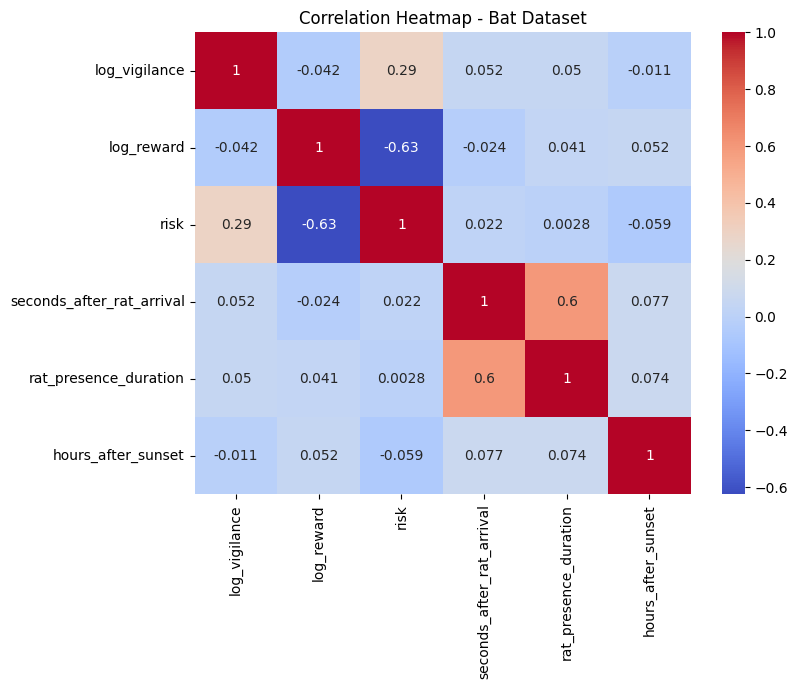

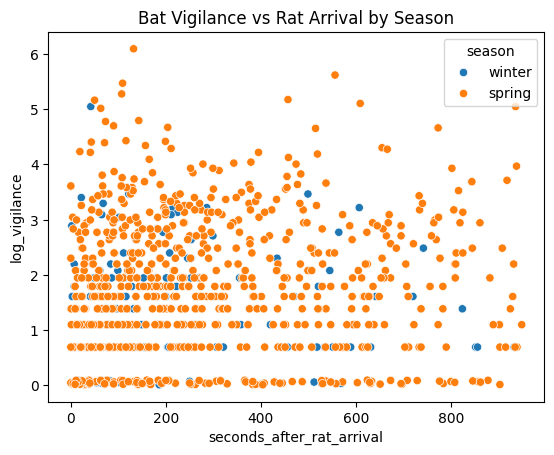


SLR (All Seasons): log_vigilance ~ seconds_after_rat_arrival
Intercept: 1.640, Coefficient: 0.000, R²: 0.003


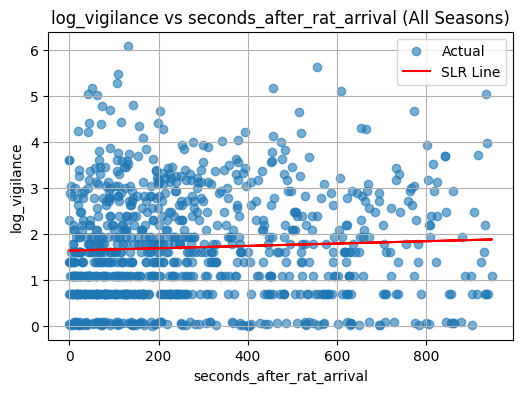


SLR (All Seasons): log_vigilance ~ rat_presence_duration
Intercept: 1.625, Coefficient: 0.000, R²: 0.003


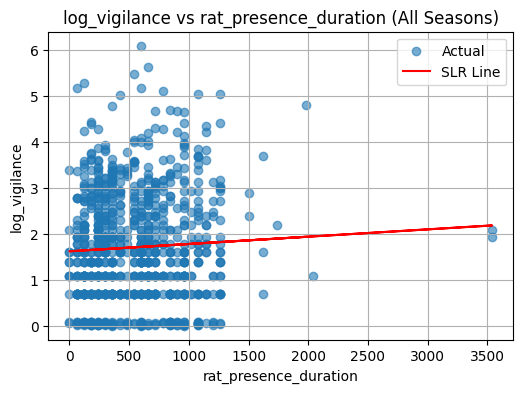


MLR Results (Winter)
Intercept: 1.430
                    Variable  Coefficient
0  seconds_after_rat_arrival    -0.000108
1      rat_presence_duration    -0.000106
2         hours_after_sunset    -0.003657
3          reward_per_second    -0.533443
4             risk_x_seconds     0.000331
R²: 0.004, RMSE: 0.942


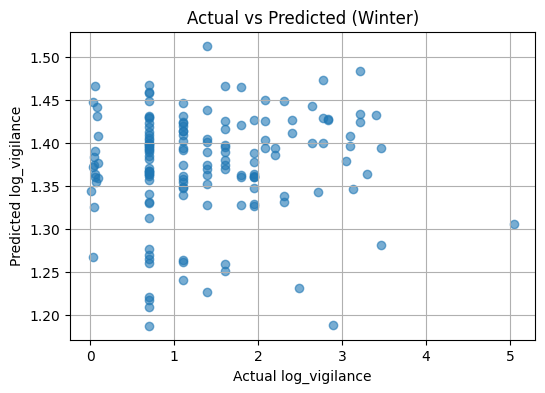


MLR Results (Spring)
Intercept: 1.741
                    Variable  Coefficient
0  seconds_after_rat_arrival    -0.000750
1      rat_presence_duration     0.000025
2         hours_after_sunset    -0.000530
3          reward_per_second    -0.453923
4             risk_x_seconds     0.001720
R²: 0.077, RMSE: 1.167


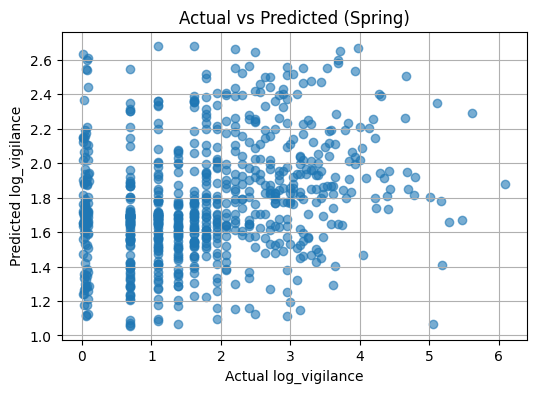


Coefficient Comparison (Spring - Winter):
                     Variable  Winter_Coefficient  Spring_Coefficient  \
0  seconds_after_rat_arrival           -0.000108           -0.000750   
1      rat_presence_duration           -0.000106            0.000025   
2         hours_after_sunset           -0.003657           -0.000530   
3          reward_per_second           -0.533443           -0.453923   
4             risk_x_seconds            0.000331            0.001720   

   Difference  
0   -0.000642  
1    0.000130  
2    0.003128  
3    0.079520  
4    0.001389  

Interpretation:
- Differences in coefficients indicate how bats respond differently to predictors in Winter vs Spring.
- Large differences suggest potential seasonal behavioural changes.
- R² and RMSE indicate model fit for each season.
- Scatter plots and SLR confirm linear relationships between Bat and Rat behaviors.



In [1]:
# ================================================
# HIT140 Assessment 3 - Investigation B (Member D) Sudip Sapkota
# Seasonal Behaviour Changes in Bats
# ================================================

# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr

# LOAD DATASETS
from google.colab import drive
drive.mount('/content/drive')

bat_path = '/content/drive/MyDrive/Colab Notebooks/cleaned_bat_data.csv'
rat_path = '/content/drive/MyDrive/Colab Notebooks/cleaned_rat_data.csv'

bat_data = pd.read_csv(bat_path)
rat_data = pd.read_csv(rat_path)

# CLEAN COLUMN NAMES
bat_data.columns = bat_data.columns.str.strip()
rat_data.columns = rat_data.columns.str.strip()

# DETECT AND FIX SEASON COLUMNS
season_cols_bat = [col for col in bat_data.columns if 'season' in col.lower()]
if len(season_cols_bat) == 0:
    raise KeyError("No season column found in bat_data")
else:
    season_col_bat = season_cols_bat[0]
    if bat_data[season_col_bat].dtype in [np.int64, np.float64]:
        bat_data[season_col_bat] = bat_data[season_col_bat].map({0:'winter', 1:'spring'})

season_cols_rat = [col for col in rat_data.columns if 'season' in col.lower()]
if len(season_cols_rat) == 0:
    season_col_rat = None
else:
    season_col_rat = season_cols_rat[0]
    if rat_data[season_col_rat].dtype in [np.int64, np.float64]:
        rat_data[season_col_rat] = rat_data[season_col_rat].map({0:'winter', 1:'spring'})

# FEATURE ENGINEERING
bat_data['log_vigilance'] = np.log(bat_data['bat_landing_to_food'] + 1)
bat_data['log_reward'] = np.log(bat_data['reward'] + 1)

# Additional features for Investigation B
bat_data['reward_per_second'] = bat_data['reward'] / (bat_data['seconds_after_rat_arrival'] + 1)
bat_data['risk_x_seconds'] = bat_data['risk'] * bat_data['seconds_after_rat_arrival']

# EDA & VISUALIZATION
print("Bat Dataset Summary:\n", bat_data.describe())
print("\nRat Dataset Summary:\n", rat_data.describe())

# Correlation check
corr_matrix = bat_data[['log_vigilance','log_reward','risk','seconds_after_rat_arrival','rat_presence_duration','hours_after_sunset']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Bat Dataset")
plt.show()

# Scatter plot: Bat Vigilance vs Rat Arrival
sns.scatterplot(data=bat_data, x='seconds_after_rat_arrival', y='log_vigilance', hue=season_col_bat)
plt.title('Bat Vigilance vs Rat Arrival by Season')
plt.show()

# SIMPLE LINEAR REGRESSION (SLR)
def simple_lr(df, x_col, y_col, season_name):
    X = df[[x_col]].fillna(0)
    y = df[y_col].fillna(0)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f"\nSLR ({season_name}): {y_col} ~ {x_col}")
    print(f"Intercept: {model.intercept_:.3f}, Coefficient: {model.coef_[0]:.3f}, R²: {r2:.3f}")
    plt.figure(figsize=(6,4))
    plt.scatter(X, y, alpha=0.6, label='Actual')
    plt.plot(X, y_pred, color='red', label='SLR Line')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{y_col} vs {x_col} ({season_name})')
    plt.legend()
    plt.grid(True)
    plt.show()
    return model

# SLR for log_vigilance ~ seconds_after_rat_arrival
simple_lr(bat_data, 'seconds_after_rat_arrival', 'log_vigilance', 'All Seasons')

# SLR for log_vigilance ~ rat_presence_duration
simple_lr(bat_data, 'rat_presence_duration', 'log_vigilance', 'All Seasons')

# SPLIT DATA BY SEASON
winter_data = bat_data[bat_data[season_col_bat]=='winter'].copy()
spring_data = bat_data[bat_data[season_col_bat]=='spring'].copy()

# MULTIPLE LINEAR REGRESSION (MLR)
features = ['seconds_after_rat_arrival', 'rat_presence_duration', 'hours_after_sunset', 'reward_per_second', 'risk_x_seconds']
response = 'log_vigilance'

def train_mlr(df, X_cols, y_col, season_name):
    X = df[X_cols].fillna(0)
    y = df[y_col].fillna(0)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    coef_df = pd.DataFrame({'Variable': X_cols, 'Coefficient': model.coef_})
    print(f"\nMLR Results ({season_name})")
    print(f"Intercept: {model.intercept_:.3f}")
    print(coef_df)
    print(f"R²: {r2:.3f}, RMSE: {rmse:.3f}")
    # Scatter plot: Actual vs Predicted
    plt.figure(figsize=(6,4))
    plt.scatter(y, y_pred, alpha=0.6)
    plt.xlabel('Actual ' + y_col)
    plt.ylabel('Predicted ' + y_col)
    plt.title(f'Actual vs Predicted ({season_name})')
    plt.grid(True)
    plt.show()
    return model

# MLR Winter
mlr_winter = train_mlr(winter_data, features, response, 'Winter')

# MLR Spring
mlr_spring = train_mlr(spring_data, features, response, 'Spring')

# COEFFICIENT COMPARISON
coef_comparison = pd.DataFrame({
    'Variable': features,
    'Winter_Coefficient': mlr_winter.coef_,
    'Spring_Coefficient': mlr_spring.coef_
})
coef_comparison['Difference'] = coef_comparison['Spring_Coefficient'] - coef_comparison['Winter_Coefficient']
print("\nCoefficient Comparison (Spring - Winter):\n", coef_comparison)

print("""
Interpretation:
- Differences in coefficients indicate how bats respond differently to predictors in Winter vs Spring.
- Large differences suggest potential seasonal behavioural changes.
- R² and RMSE indicate model fit for each season.
- Scatter plots and SLR confirm linear relationships between Bat and Rat behaviors.
""")
